**Q1**. A pulse tracer input into a PFR showed the following outlet concentration:

The experimental data between 2 and 4 min were fit into the line equation $C_{out} = -2t+17$, with $C_{out}$ in $[mM]*$ and $t$ in $[min]$.

    a) Find the RTD function.
    b) Find mean residence time.
    c) Find variance.
    d) What is the fraction of material that spends in the reactor 3 minutes and longer?
* [M] means [mol/L] – it is a molar concentration in a fluid (gas or liquid)
![Q1.png](Q1.png)

$C(t) = $

     0        0 < t  < 2
     -2t+17   2=< t =< 4
     0            t > 4

Text(0.5, 1.0, 'Exiting tracer concentration (pulse input)')

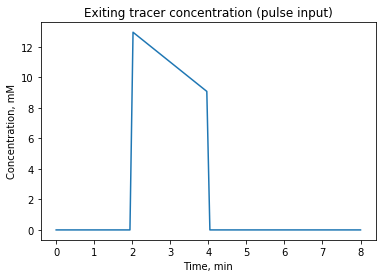

In [5]:
import numpy as np
t=np.linspace(0.,8.,100)
C=np.zeros(len(t))

for i in range(0,len(t)):
    if 0<t[i]<2: 
        C[i]=0
    elif 2<=t[i]<=4:
        C[i]=-2*t[i]+17
    else:
        C[i]=0

        
import matplotlib.pyplot as plt
plt.plot(t,C)
plt.ylabel('Concentration, mM')
plt.xlabel('Time, min')
plt.title('Exiting tracer concentration (pulse input)')

$\int_0^\infty C(t)dt=0+\int_2^4(-2*t+17)dt+0=-2\int_2^4tdt+17\int_2^4dt=22.$

In [8]:
import numpy as np
import scipy.integrate as integrate

t=np.linspace(0.,8.,10000)
C=np.zeros(len(t))

for i in range(0,len(t)):
    if 0<t[i]<2: 
        C[i]=0
    elif 2<=t[i]<=4:
        C[i]=-2*t[i]+17
    else:
        C[i]=0

I = integrate.cumtrapz(C, t, initial=0) 
print ("{0:.3f}".format(I[len(I)-1]))


22.003


**a**. Find an RTD function : $E(t)=\frac{C(t)}{\int_0^\infty C(t)dt}$
        
$E(t) = $

     0             0 < t  < 2
     (-2t+17)/22   2=< t =< 4
     0                 t > 4

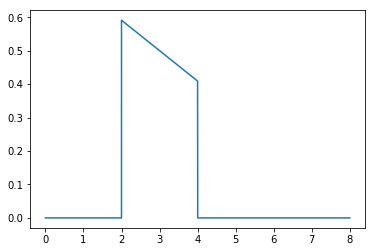

In [9]:
import numpy as np
import matplotlib.pyplot as plt
E=np.zeros(len(t))

for i in range(0,len(t)):

     E[i]=C[i]/I[len(I)-1]
E        
plt.plot(t,E)

**b**. Mean residence time

$\bar{t}=\int_0^2 tE(t)dt+ \int_2^4 tE(t)dt+ \int_4^\infty tE(t)dt=...$

$...=\int_0^\infty tE(t)dt=0+\int_2^4 tE(t)dt+0=...$

$...=\int_2^4(t\frac{-2t+17}{22})dt=-\frac{2}{22}(\frac{4^3}{3}-\frac{2^3}{3})+\frac{17}{22}(\frac{4^2}{2}-\frac{2^2}{2})=...$

$...=2.934  min$

In [10]:
t_r=np.zeros(len(t))
for i in range(0,len(t)):
    t_r[i]=t[i]*E[i]


tr = integrate.trapz(t_r, t)

print ("mean residence time ={0:.3f}".format(tr))

mean residence time =2.939


**c**. Find the varience

$\sigma^2=\int_0^\infty t^2E(t)dt-\bar{t}^2=\int_2^4 t^2(\frac{-2t+17}{22})dt-2.939^2=...$

$...=\frac{-1}{11}(\frac{4^4}{4}-\frac{2^4}{4})+\frac{17*4^3}{22*3}-\frac{17*2^3}{22*3}-2.939^2=...$

$...=0.33 min^2$

In [14]:
v=np.zeros(len(t))

for i in range(0,len(t)):
    v[i]=t[i]*t[i]*E[i]
    

Va = integrate.trapz(v, t)

Var=Va-(2.9*2.9)
Var1=Va-(tr*tr)
print ("Varience of residence times = {0:.3f}".format(Var1), 'min^2')#, "vs {0:.3f}".format(Var), 'min^2')

Varience of residence times = 0.330 min^2


**d**. Fraction of the material spends in the reactor longer than 3 min.

We use cummulative distribution function, $F(t)=\int_0^t E(t) dt$ and then we find $1-F(t)$?

$F(3)=\int_0^3 t dt+ \frac{17}{22}\int_2^3 dt=\frac{-2}{22}(\frac{3^2}{2}-\frac{2^2}{2})+\frac{17}{22}(3-2)=0.545$

$1-F(3)=0.455$

Fraction spends in the reactor less than 3 min = 0.545
Fraction spends in the reactor greater than 3 min = 0.455


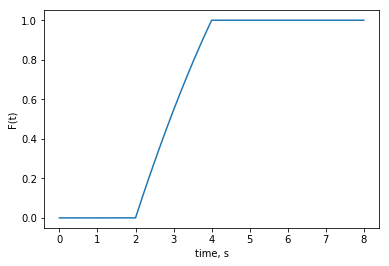

In [15]:
y=np.zeros(len(t))


for i in range (2,len(t)+1):
        y[i-1]=integrate.trapz(E[0:i],t[0:i])
    
k=0

plt.plot(t,y)
plt.ylabel("F(t)")
plt.xlabel("time, s")

for i in range(0,len(t)):
    if 2.99 < t[i] < 3.00:
        k=i

#print(k)
    
print ("Fraction spends in the reactor less than 3 min = {0:.3f}".format(y[k-1])) 
print ("Fraction spends in the reactor greater than 3 min = {0:.3f}".format(1-y[k-1]))

**Q2**. Residence time distribution in real reactors and its characteristics. *From Chapter 13, 4th Ed. Fogler*


The following data were obtained from a pulse tracer test to a real flow reactor:

|t(s)|0|5|10|15|20|25|30|35|
|----|--|--|---|--|--|--|--|--|
|C(mg/dm^3)|0|0|0|5|10|5|0|0|

    a) Plot RTD function
    b) Find the fraction of material that spends between 15 and 20 seconds in the reactor
    c) Plot cumulative distribution function F(t)
    d) What fraction of the material spends 25 seconds or less in the reactor?
    e) Find mean residence time.

**a**. RTD function is $E(t)=\frac{C(t)}{\int_0^\infty C(t) dt}$

To find the total concentration in the denominator, we plot $C(t)$ vs. time and evaluate the area:
![Q2.png](Q2.png)

Area = 0.5* (20-10) s* 10 $\frac{mg}{dm^3}+0.5*(30-20) s * 10 \frac{mg}{dm^3}=...$

$...= 100 \frac{mg.s}{dm^3}$

Text(0.5, 0, 'Time, s')

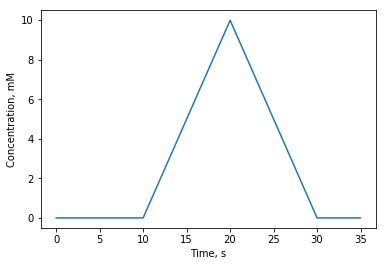

In [18]:
t2=np.linspace(0.,35,1000)
C2=np.zeros(len(t2))

for i in range(0,len(t2)):
    if 0<t2[i]<10: 
        C2[i]=0
    elif 10<=t2[i]<20:
        C2[i]=t2[i]-10
    elif 20<=t2[i]<=30:
        C2[i]=30-t2[i]
    else:
        C2[i]=0

import matplotlib.pyplot as plt
plt.plot(t2,C2)
plt.ylabel('Concentration, mM')
plt.xlabel('Time, s')

In [19]:
I2 = integrate.cumtrapz(C2, t2, initial=0) 
print ("The total concentration in denominator ={0:.3f}".format(I[len(I)-1]), "mg.s/dm^3")

The total concentration in denominator =22.003 mg.s/dm^3


RTD function is  $𝐸(𝑡)=\frac{𝐶(𝑡)}{\int_0^\infty 𝐶(𝑡)}𝑑𝑡$

$𝐸(𝑡)=\frac{𝐶(𝑡)}{100}  \frac{dm^3}{mg}$

|t(s)|0|5|10|15|20|25|30|35|
|----|--|--|---|--|--|--|--|--|
|C(mg/dm^3)|0|0|0|5|10|5|0|0|
|E(dm^3/mg)|0|0|0|0.05|0.1|0.05|0|0|

Text(0.5, 0, 'Time, s')

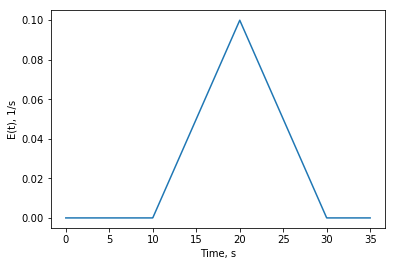

In [20]:
import numpy as np
import matplotlib.pyplot as plt
E2=np.zeros(len(t2))

for i in range(0,len(t2)):

     E2[i]=C2[i]/I2[len(I2)-1]
E2        
plt.plot(t2,E2)
plt.ylabel('E(t), 1/s')
plt.xlabel('Time, s')

**b**. Fraction of material spending between 15 and 20 seconds in the reactor = $\int_{15}^{20} E(t) dt$

$\int_{15}^{20} E(t) dt = (20-15) s*(0.05) s^{-1} + 0.5*(20-15)s*(0.1-0.05) s^{-1}=...$

$...=0.25+0.125 = 0.375$

In [26]:
y2=np.zeros(len(t2))


for i in range (2,len(t2)+1):
        y2[i-1]=integrate.trapz(E2[0:i],t2[0:i])
    
k2=0
k22=0

for i in range(0,len(t2)):
    if 14.84 < t2[i] < 15.00:
        k2=i
    if 19.79 < t2[i] < 20.00:
        k22=i
    
print ("{0:.3f}".format((y2[k22-1]-y2[k2-1])*100), "% of material spends between 15-20 seconds in the reactor")


37.051 % of material spends between 15-20 seconds in the reactor


**c**. Plot cumulative distribution function. 

To find F(t) for each point we need to know area under E(0) from time 0 up to time t.

Based on analytical calcualtion:

F(5)=0

F(10)=0

F(15)= $\int_0^{15} E(t) dt= \int_{10}^{15} E(t) dt = 0.5*(0.05 min)*(15-10) = 0.125$

F(20)= $\int_0^{20} E(t) dt= \int_{10}^{20} E(t) dt = 0.5*(0.1 min)*(20-10) = 0.5$

F(25)= $\int_0^{25} E(t) dt= \int_{10}^{25} E(t) dt = 0.5 + (0.05 min)*(25-20) + 0.5*0.05*(25-20) = 0.875$

F(25)= $\int_0^{30} E(t) dt= \int_{10}^{30} E(t) dt = 1$



|t(s)|0|5|10|15|20|25|30|35|
|----|--|--|---|--|--|--|--|--|
|C(t)(mg/dm^3)|0|0|0|5|10|5|0|0|
|E(t)(dm^3/mg)|0|0|0|0.05|0.1|0.05|0|0|
|F(t)|0|0|0|0.125|0.5|0.875|1|1|

In [25]:
k3=0
k4=0
k5=0
k6=0

for i in range(0,len(t2)):
    if 14.99 < t2[i] < 15.03:
        k3=i
    if 19.99 < t2[i] < 20.02:
        k4=i
    if 24.99 < t2[i] < 25.02:
        k5=i
    if 29.99 < t2[i] < 30.02:
        k6=i
        
print ("Fraction spends in the reactor:")
print ("        less than 10 s = ", 0)
print ("        less than 15 s = {0:.3f}".format(y2[k3-1]))
print ("        less than 20 s = {0:.3f}".format(y2[k4-1]))
print ("        less than 25 s = {0:.3f}".format(y2[k5-1]))
print ("        less than 30 s = {0:.3f}".format(y2[k6-1]))
print ("        less than 35 s = {0:.3f}".format(y2[len(y2)-1]))

Fraction spends in the reactor:
        less than 10 s =  0
        less than 15 s = 0.123
        less than 20 s = 0.497
        less than 25 s = 0.874
        less than 30 s = 1.000
        less than 35 s = 1.000


Text(0.5, 1.0, 'Cumulative distribution function')

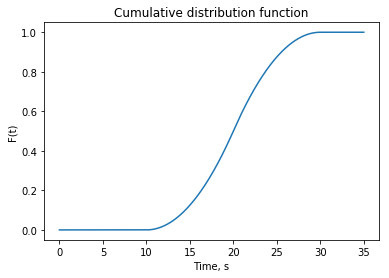

In [23]:
plt.plot(t2,y2)
plt.ylabel('F(t)')
plt.xlabel('Time, s')
plt.title('Cumulative distribution function')

**d**. What fraction of material spends 25 seconds or less in the reactor.

In [27]:
print (" -----------------------------------")
print ("{0:.1f}".format(y2[k5-1]*100), "% of material spends 25 seconds or less in the reactor")

 -----------------------------------
87.4 % of material spends 25 seconds or less in the reactor


**e**. mean residence time. $\bar{t}=\int_0^\infty t. E(t) dt$

In [ ]:
t_r2=np.zeros(len(t2))
for i in range(0,len(t2)):
    t_r2[i]=t2[i]*E2[i]

    
tr2 = integrate.trapz(t_r2, t2)


print ("mean residence time ={0:.1f}".format(tr2), 's')
plt.plot(t2,t_r2)
plt.ylabel('t*E(t)')
plt.xlabel('time, s')

k33=0
k44=0
k55=0
k66=0

for i in range(0,len(t2)):
    if 14.99 < t2[i] < 15.03:
        k33=i
    if 19.99 < t2[i] < 20.02:
        k44=i
    if 24.99 < t2[i] < 25.02:
        k55=i
    if 29.99 < t2[i] < 30.02:
        k66=i
        
print ("-----------------------------------")    